# Notebook por: Márcio Sousa

# Projeto: Predição de Insuficiência Cardíaca (Heart Failure Prediction Dataset)

## Objetivos:
O objetivo desse prejeto é realizar a construção de um modelo que faça a predição de insuficiência cardíaca de pacientes, utilizando modelos preditivos aplicados ao dataset 'Heart Failure Prediction Dataset' do Kaggle. O projeto envolve desde a análise exploratória dos dados até a validação do modelo. O dataset apresenta as seguinte colunas:

*   **Age:** Idade do paciente [anos].

*   **Sex:** Sexo do paciente [M: Masculino, F: Feminino].

*   **ChestPainType:** Tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginal, ASY: Assintomático].

*   **RestingBP:** Pressão arterial em repouso [mm Hg].

*  **Cholesterol:** Colesterol sérico [mm/dl].

*   **FastingBS:** Glicemia em jejum [1: se Glicemia em jejum > 120 mg/dl, 0: caso contrário].

*   **RestingECG:** Resultados do eletrocardiograma em repouso [Normal: Normal, ST: anormalidade na onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV), LVH: hipertrofia ventricular esquerda provável ou definitiva pelos critérios de 'Estes'].

*   **MaxHR:** Frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202].

*   **ExerciseAngina:** Angina induzida por exercício [Y: Sim, N: Não].

*   **Oldpeak:** Oldpeak = ST [Valor numérico medido em depressão].

*   **ST_Slope:** Inclinação do segmento ST no pico do exercício [Up: ascendente, Flat: plano, Down: descendente].

*   **HeartDisease:** Target [1: doença cardíaca, 0: Normal].


# Importando o Dataset e Bibliotecas

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)

dataframe = pd.read_csv('Dataset/heart.csv')

dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Análise Exploratória dos Dados (EDA)

### Análise Geral

In [69]:
dataframe.shape

(918, 12)

*Obs:* O dataset utilizado é considerado um dataset pequeno. (Influenciará mais a frente no projeto)

In [70]:
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [71]:
dataframe.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


*Obs:* Observe que 'RestingBP' e 'Cholesterol' possuem alguma (as) linha (as) zerada (as), o que seria um valor inconsistente com a realidade do corpo humano. Atente-se, também, que 'Oldpeak' possui linha (as) negativa (as), o que também seria incoerente com a realidade.

In [72]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [73]:
dataframe.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Obs: Observe que as colunas 'Cholesteol' e 'MaxHR' possuem diversos valores distintos, será interessante fazer uma Feature Engineering mais a frente. ('RestinBP', 'Age', e 'Oldpeak' também são candidatos)

In [74]:
dataframe.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [75]:
dataframe.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

O dataset não apresenta valores nulos.

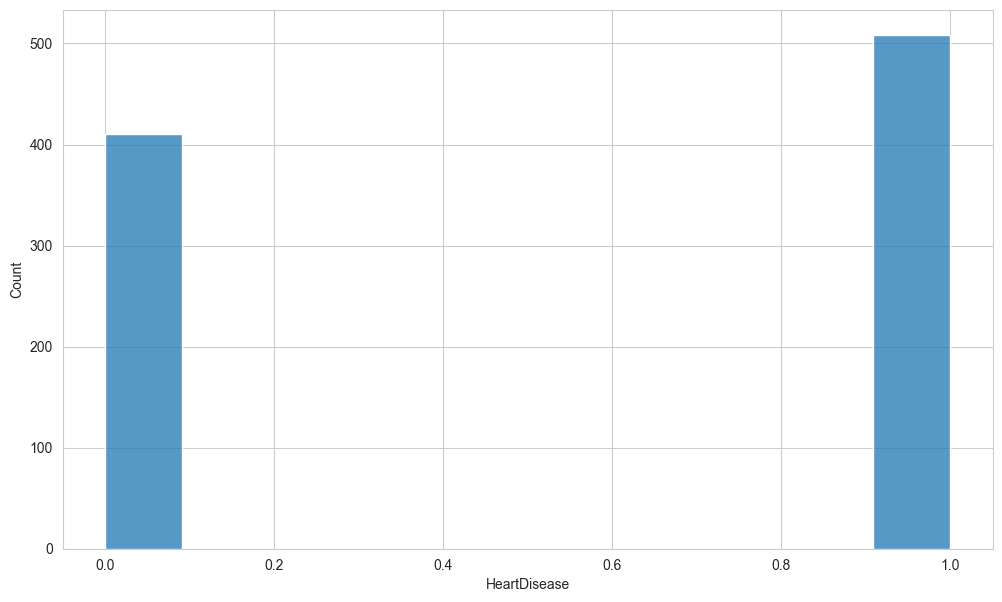

In [76]:
sns.histplot(dataframe, x = 'HeartDisease')
plt.show()

In [77]:
h0 = (dataframe['HeartDisease'] == 0).sum()
h1 = (dataframe['HeartDisease'] == 1).sum()

print(f'HeartDisease 0: {h0}')
print(f'HeartDisease 1: {h1}')

HeartDisease 0: 410
HeartDisease 1: 508


Um dataset balanceado.

In [78]:
dataframe.corr(numeric_only= True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


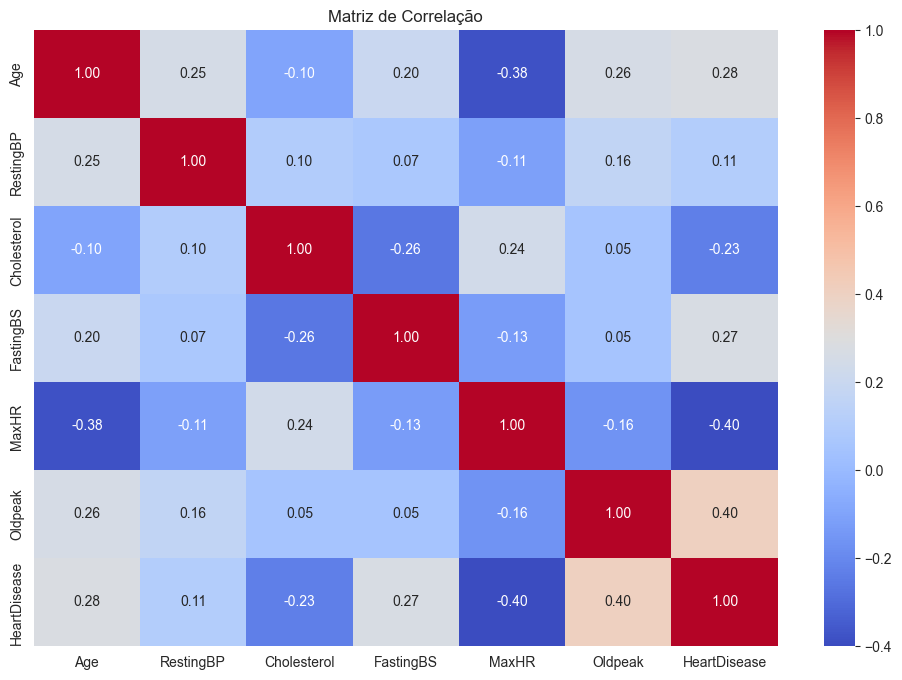

In [79]:
corr = dataframe.corr(numeric_only= True)
plt.figure(figsize= (12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Matriz de Correlação')
plt.show()

In [80]:
numeric_columns = dataframe.select_dtypes(include=['number'])
numeric_columns_clean = numeric_columns.drop('HeartDisease', axis = 1)

graph = px.scatter_matrix(numeric_columns, dimensions=numeric_columns_clean, color = 'HeartDisease', height=800)
graph.show()

Obs.: Como existem valores inconscistentes, as correlações podem estar equivocadas

In [81]:
cholesterol_invalido = (dataframe['Cholesterol'] == 0).sum()
restingBP_invalido = (dataframe['RestingBP'] == 0).sum()
oldpeak_invalido = (dataframe['Oldpeak'] < 0).sum()

print(f'Quantidade de registros com colesterol inválido (igual a 0): {cholesterol_invalido} | {cholesterol_invalido/918*100:.1f}%')
print(f'Quantidade de registros com restingBP (pressão arterial em repouso) inválido (igual a 0): {restingBP_invalido} | {restingBP_invalido/918*100:.1f}%')
print(f'Quantidade de registros com oldpeak inválido (menor que 0): {oldpeak_invalido} | {oldpeak_invalido/918*100:.1f}%')

Quantidade de registros com colesterol inválido (igual a 0): 172 | 18.7%
Quantidade de registros com restingBP (pressão arterial em repouso) inválido (igual a 0): 1 | 0.1%
Quantidade de registros com oldpeak inválido (menor que 0): 13 | 1.4%


Como a quantidade de valores inconsistentes na coluna 'Cholesterol' equivale a 18.7% do dataset completo, será necessário, mais tarde, substituir esses valores pela mediana da coluna. Já a quantidade de valores inconsistentes na coluna 'RestingBP' equivale a 0.1%, ou seja, essa linha poderá ser descartada, o mesmo serve para 'Oldpeak'.

### Análise Univariada

#### Age

In [82]:
#MAX AND MIN AGE
max_ = dataframe['Age'].max()
min_ = dataframe['Age'].min()
print(f"Idade máxima: {max_}")
print(f"Idade mínima: {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = dataframe['Age'].between(next,arr[i+1]).sum()
        print(f'Número de pessoas com a idade entre {next} e {arr[i+1]}: {num_people}')

age_group([27, 36, 46, 56, 66, 77])

Idade máxima: 77
Idade mínima: 28
Número de pessoas com a idade entre 28 e 36: 38
Número de pessoas com a idade entre 37 e 46: 182
Número de pessoas com a idade entre 47 e 56: 330
Número de pessoas com a idade entre 57 e 66: 299
Número de pessoas com a idade entre 67 e 77: 69


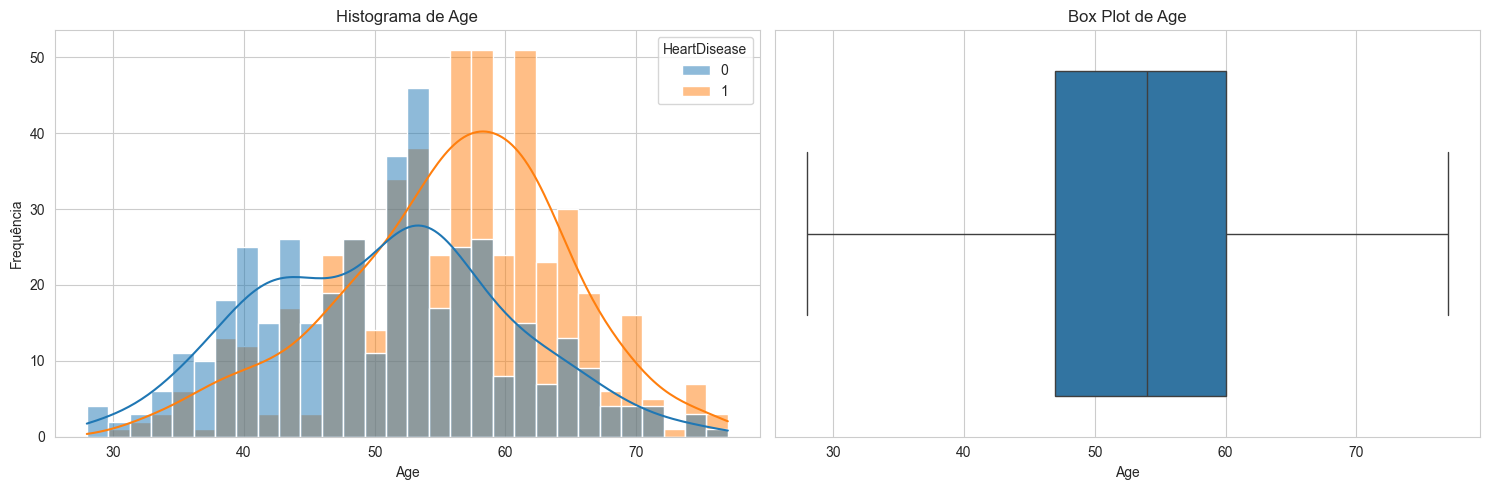

In [83]:
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data = dataframe, x = 'Age', kde=True, bins=30, hue='HeartDisease')
plt.title('Histograma de Age')
plt.xlabel('Age')
plt.ylabel('Frequência')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=dataframe['Age'])
plt.title(f'Box Plot de Age')
plt.xlabel('Age')

plt.tight_layout()

#### RestingBP

In [84]:
max_ = dataframe['RestingBP'].max()
min_ = dataframe['RestingBP'].min()
print(f'RestingBP máximo: {max_}')
print(f'RestingBP mínimo: {min_}')


def restingbp_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = dataframe['RestingBP'].between(next,arr[i+1]).sum()
        print(f'Número de pessoas com o RestingBP entre {next} e {arr[i+1]}: {num_people}')

restingbp_group([79, 105, 130, 155, 180, 200])

RestingBP máximo: 200
RestingBP mínimo: 0
Número de pessoas com o RestingBP entre 80 e 105: 43
Número de pessoas com o RestingBP entre 106 e 130: 449
Número de pessoas com o RestingBP entre 131 e 155: 326
Número de pessoas com o RestingBP entre 156 e 180: 91
Número de pessoas com o RestingBP entre 181 e 200: 8


Obs.: O valor '0' é um outlier (valor inválido) e será corrigido mais a frente.

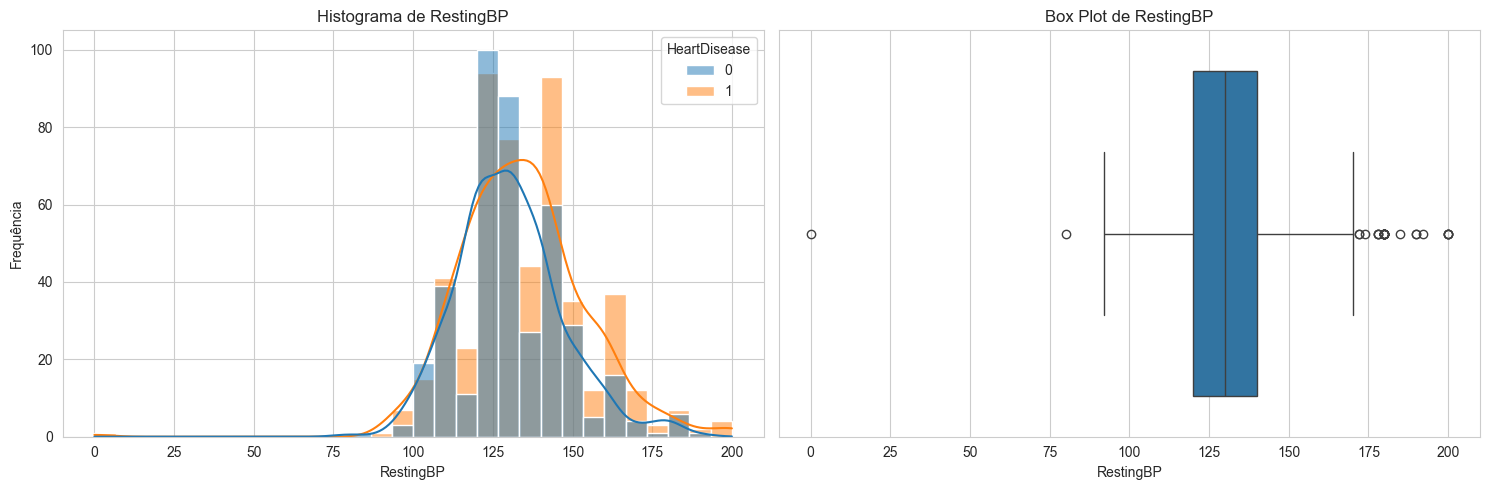

In [85]:
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data = dataframe, x = 'RestingBP', kde=True, bins=30, hue='HeartDisease')
plt.title('Histograma de RestingBP')
plt.xlabel('RestingBP')
plt.ylabel('Frequência')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=dataframe['RestingBP'])
plt.title(f'Box Plot de RestingBP')
plt.xlabel('RestingBP')

plt.tight_layout()

#### Cholesterol

In [86]:
max_ = dataframe['Cholesterol'].max()
min_ = dataframe['Cholesterol'].min()
print(f'Cholesterol máximo: {max_}')
print(f'Cholesterol mínimo: {min_}')


def cholesterol_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = dataframe['Cholesterol'].between(next,arr[i+1]).sum()
        print(f'Número de pessoas com o Cholesterol entre {next} e {arr[i+1]}: {num_people}')

cholesterol_group([84, 200, 300, 400, 603])

Cholesterol máximo: 603
Cholesterol mínimo: 0
Número de pessoas com o Cholesterol entre 85 e 200: 150
Número de pessoas com o Cholesterol entre 201 e 300: 493
Número de pessoas com o Cholesterol entre 301 e 400: 90
Número de pessoas com o Cholesterol entre 401 e 603: 13


Obs.: Os valores '0' são valores inválidos, e serão tratados mais a frente.

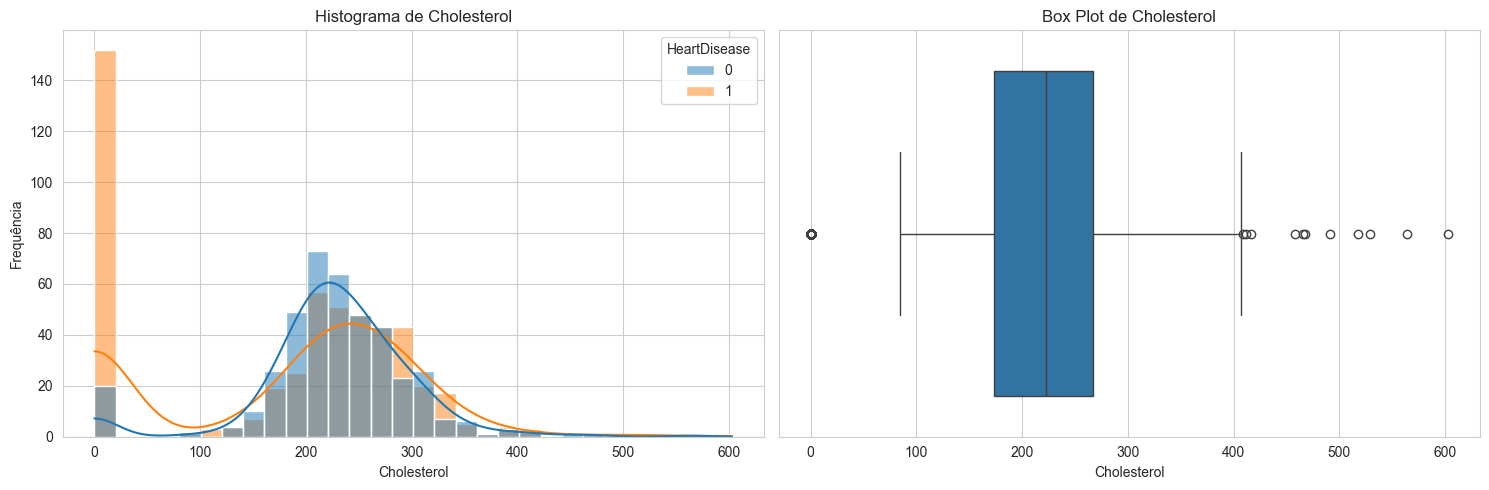

In [87]:
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data = dataframe, x = 'Cholesterol', kde=True, bins=30, hue='HeartDisease')
plt.title('Histograma de Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequência')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=dataframe['Cholesterol'])
plt.title(f'Box Plot de Cholesterol')
plt.xlabel('Cholesterol')

plt.tight_layout()

Obs.: Valores inválidos totalmente enviesados. Seria interessante remover a coluna.

#### MaxHR

In [88]:
max_ = dataframe['MaxHR'].max()
min_ = dataframe['MaxHR'].min()
print(f'MaxHR máximo: {max_}')
print(f'MaxHR mínimo: {min_}')


def MaxHR_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = dataframe['MaxHR'].between(next,arr[i+1]).sum()
        print(f'Número de pessoas com o MaxHR entre {next} e {arr[i+1]}: {num_people}')

MaxHR_group([59, 95, 130, 165, 202])

MaxHR máximo: 202
MaxHR mínimo: 60
Número de pessoas com o MaxHR entre 60 e 95: 45
Número de pessoas com o MaxHR entre 96 e 130: 349
Número de pessoas com o MaxHR entre 131 e 165: 393
Número de pessoas com o MaxHR entre 166 e 202: 131


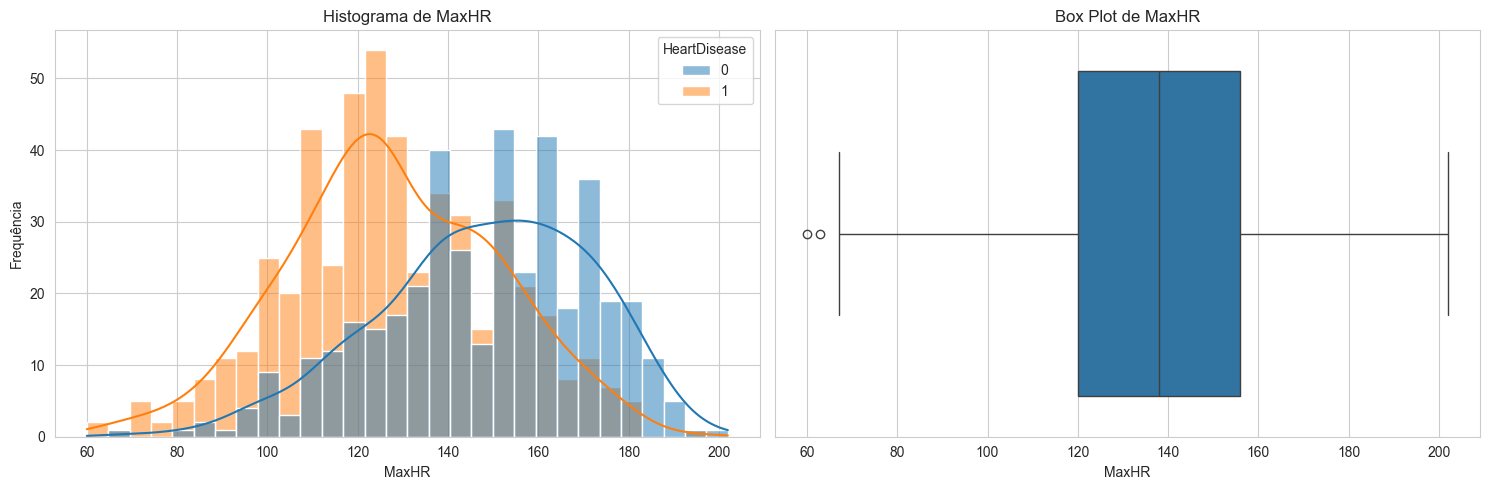

In [89]:
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data = dataframe, x = 'MaxHR', kde=True, bins=30, hue='HeartDisease')
plt.title('Histograma de MaxHR')
plt.xlabel('MaxHR')
plt.ylabel('Frequência')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=dataframe['MaxHR'])
plt.title(f'Box Plot de MaxHR')
plt.xlabel('MaxHR')

plt.tight_layout()

#### Oldpeak

In [90]:
max_ = dataframe['Oldpeak'].max()
min_ = dataframe['Oldpeak'].min()
print(f'Oldpeak máximo: {max_}')
print(f'Oldpeak mínimo: {min_}')


def Oldpeak_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = dataframe['Oldpeak'].between(next,arr[i+1]).sum()
        print(f'Número de pessoas com o Oldpeak entre {next} e {arr[i+1]}: {num_people}')

Oldpeak_group([-1, 1.5, 3, 4.5, 6.2])

Oldpeak máximo: 6.2
Oldpeak mínimo: -2.6
Número de pessoas com o Oldpeak entre 0 e 1.5: 683
Número de pessoas com o Oldpeak entre 2.5 e 3: 59
Número de pessoas com o Oldpeak entre 4 e 4.5: 11
Número de pessoas com o Oldpeak entre 5.5 e 6.2: 2


Obs.: Os valores menores que 0 são valores inválidos, e serão substituidos mais a frente.

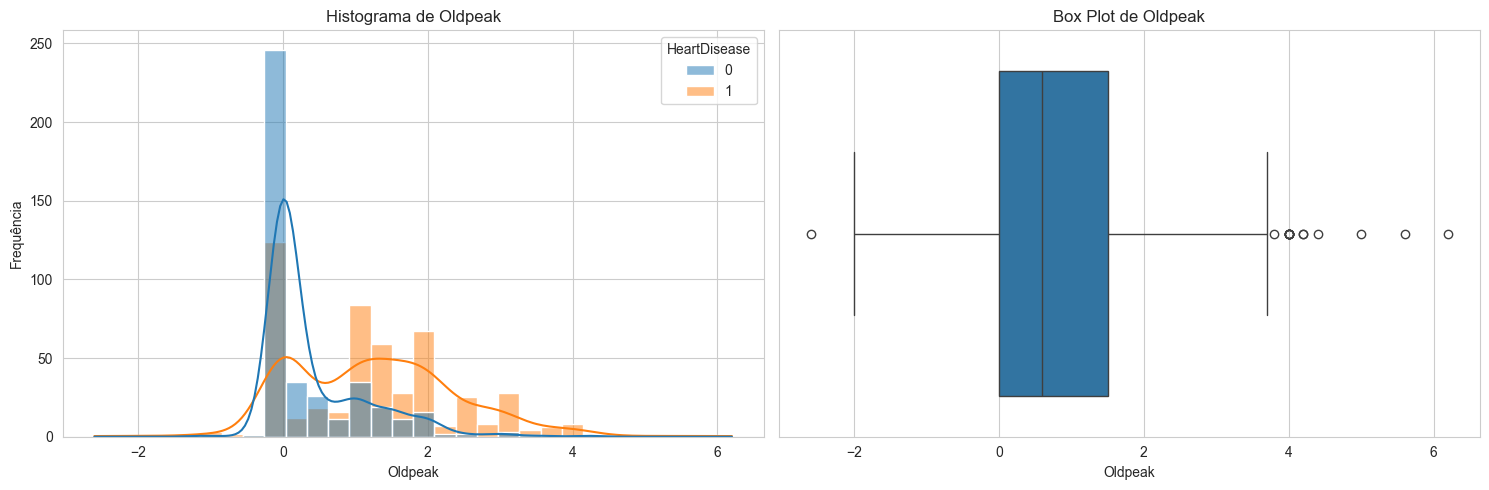

In [91]:
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data = dataframe, x = 'Oldpeak', kde=True, bins=30, hue='HeartDisease')
plt.title('Histograma de Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequência')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=dataframe['Oldpeak'])
plt.title(f'Box Plot de Oldpeak')
plt.xlabel('Oldpeak')

plt.tight_layout()

### Distribuição das Variáveis Categóricas

In [92]:
categorical_cols = dataframe.select_dtypes(include='object').columns.tolist()
categorical_cols.extend(['FastingBS', 'HeartDisease']) # Adicionar FastingBS e HeartDisease de volta como categóricos

print(categorical_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']


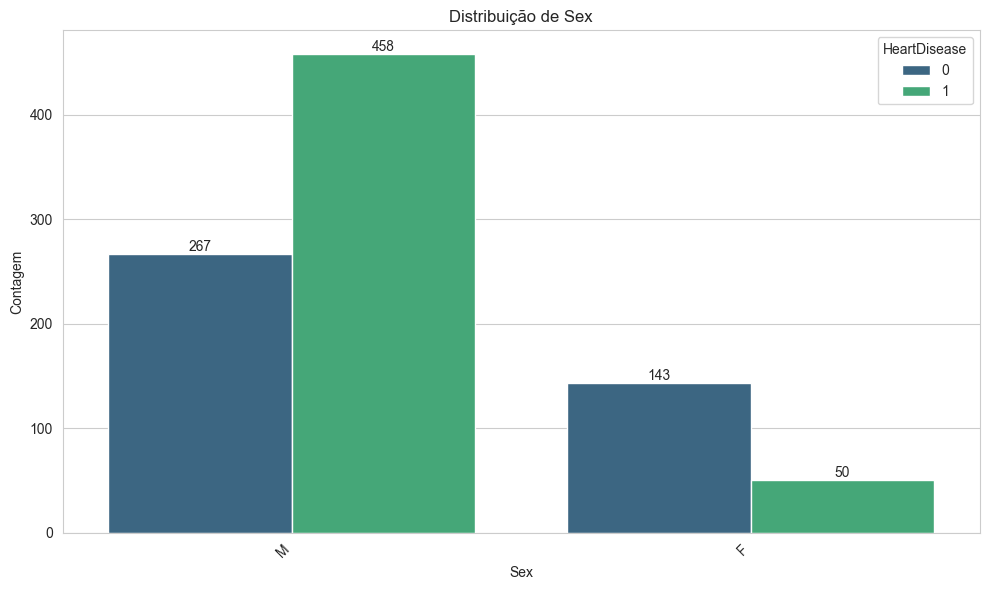

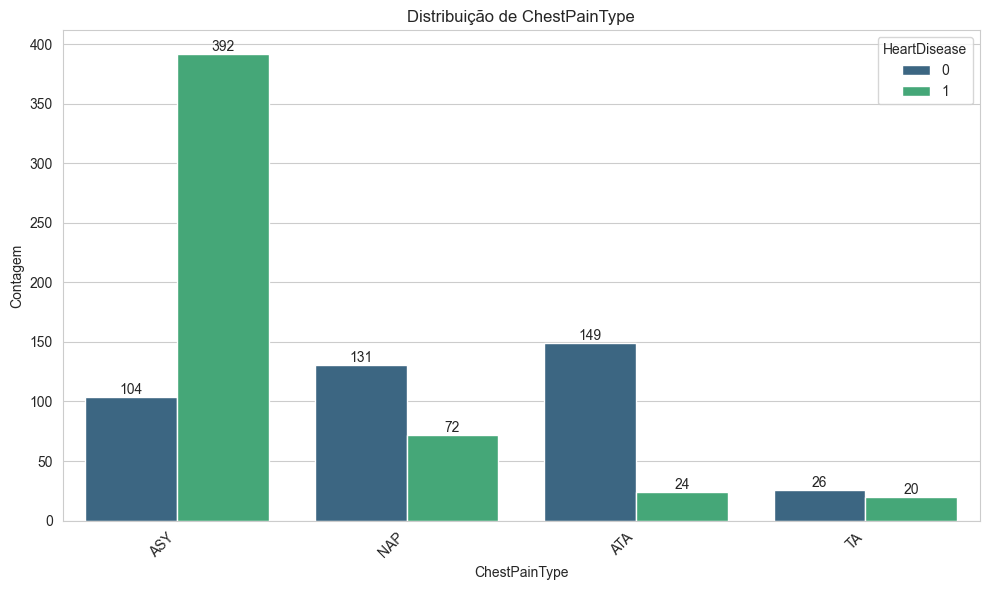

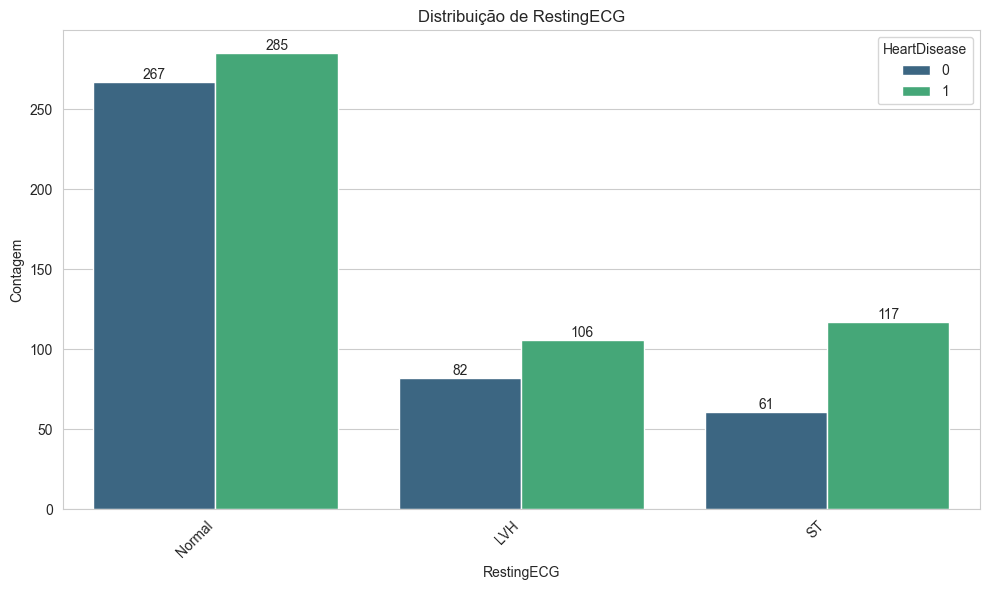

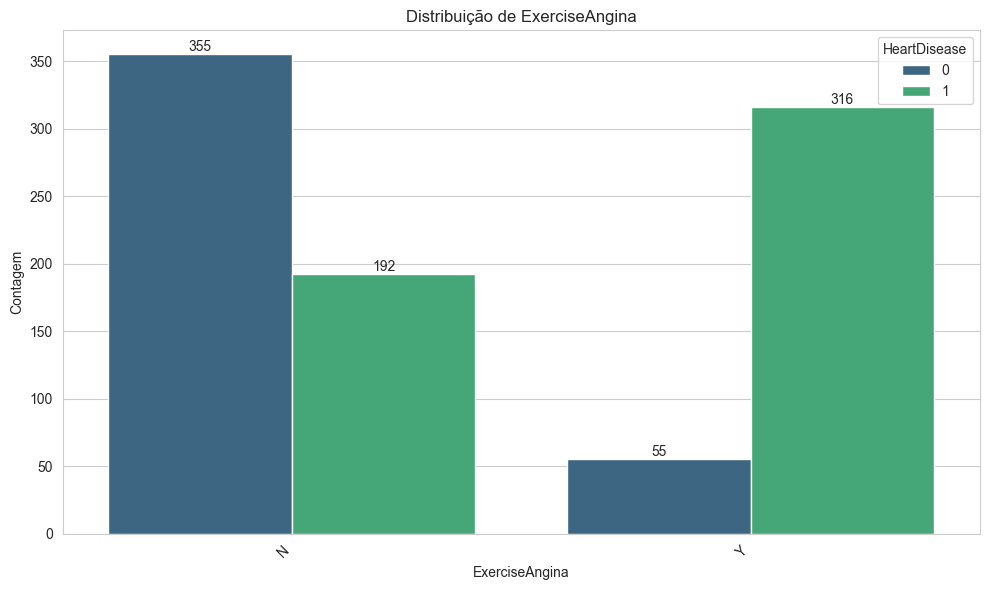

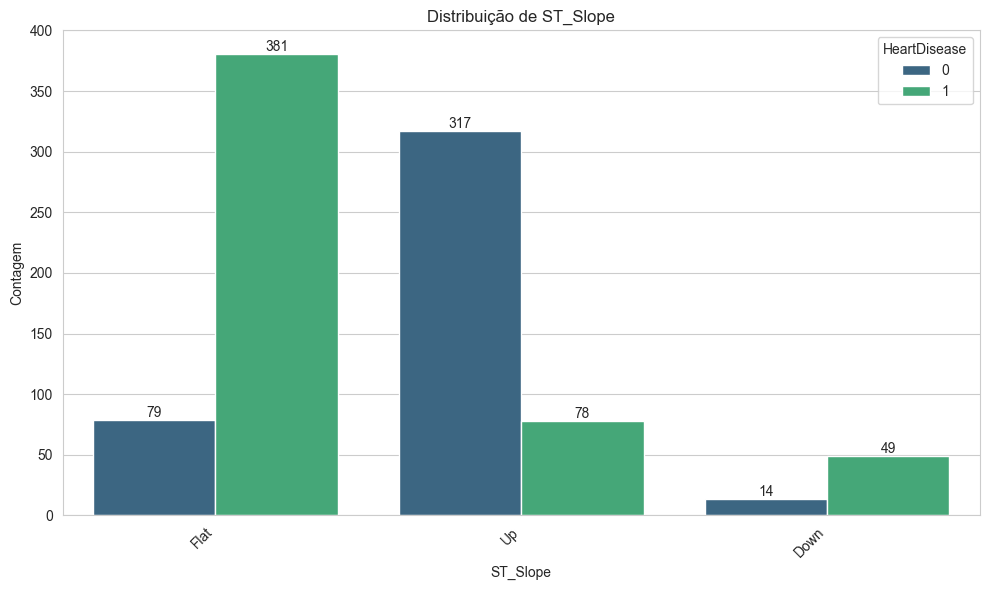

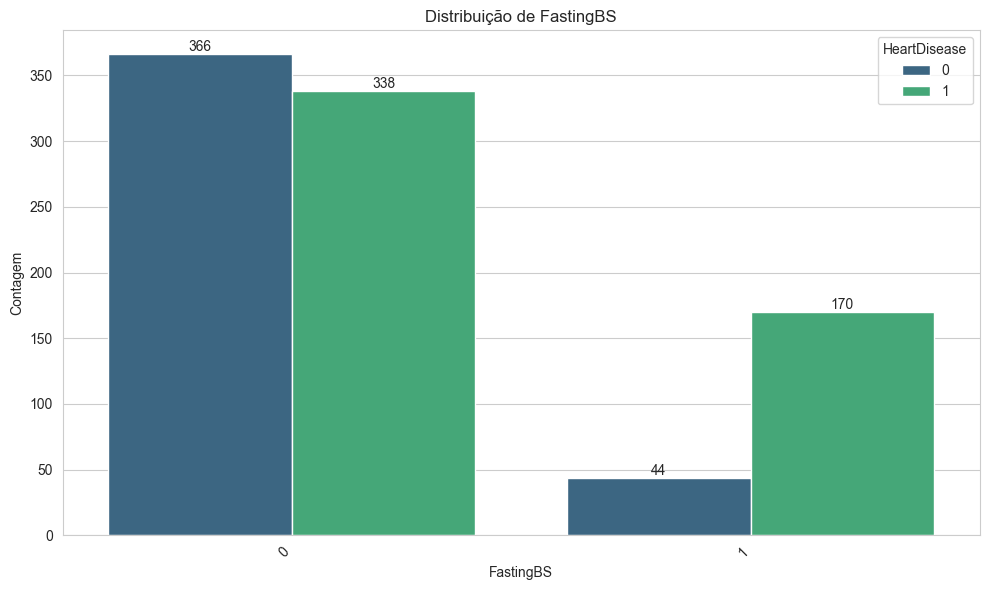

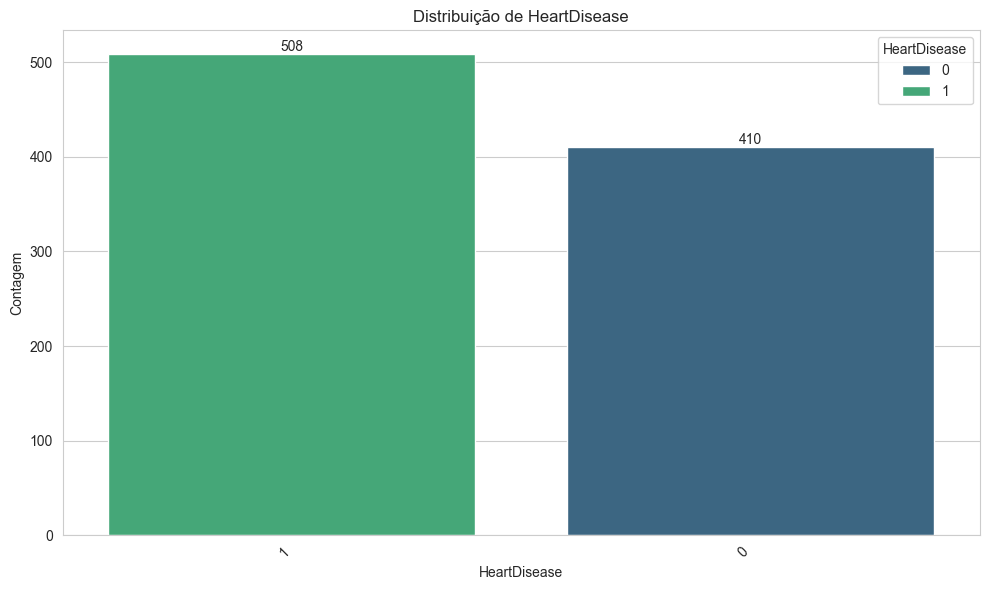

In [93]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=dataframe, x=col, order=dataframe[col].value_counts().index, palette='viridis', hue='HeartDisease')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    # Adicionar contagens nas barras
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

# Lidando com Outliers

In [94]:
clean_data = dataframe.copy()

# Adicionando colunas flag para indicar se as colunas 'RestingBP', 'Cholesterol' e 'Oldpeak' tiveram valores inválidos

clean_data['RestingBP_missing'] = (clean_data['RestingBP'] == 0).astype(int)
clean_data['Cholesterol_missing'] = (clean_data['Cholesterol'] == 0).astype(int)
clean_data['Oldpeak_missing'] = (clean_data['Oldpeak'] < 0).astype(int)

clean_data.drop('Cholesterol', axis=1, inplace=True) # Removendo a coluna por ter vários valores enviesados

clean_data.loc[clean_data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_missing,Cholesterol_missing,Oldpeak_missing
449,55,M,NAP,0,0,Normal,155,N,1.5,Flat,1,1,1,0


Obs.: Mesmo removendo a coluna 'Cholesterol', é interessante adicionar uma flag de que aquele registro tinha um valor zerado de colesterol. Isso porque os valores zerados tinham um viés muito tedencioso para Heart Disease = 1.

In [95]:
# Substituindo os valores inválidos nas colunas, pela mediana sem os valores inválidos.
restingbp_median = clean_data.loc[clean_data['RestingBP_missing'] == 0, 'RestingBP'].median()
oldpeak_median = clean_data.loc[clean_data['Oldpeak_missing'] == 0, 'Oldpeak'].median()

clean_data['RestingBP'] = clean_data['RestingBP'].replace(0, restingbp_median)
clean_data.loc[clean_data['Oldpeak_missing'] == 1, 'Oldpeak'] = oldpeak_median

clean_data.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingBP_missing,Cholesterol_missing,Oldpeak_missing
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,0.233115,136.809368,0.909804,0.553377,0.001089,0.187364,0.014161
std,9.432617,17.990127,0.423046,25.460334,1.040160,0.497414,0.033005,0.390416,0.118220
min,28.000000,80.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,0.000000,138.000000,0.600000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,140.000000,0.000000,156.000000,1.500000,1.000000,0.000000,0.000000,0.000000
max,77.000000,200.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000


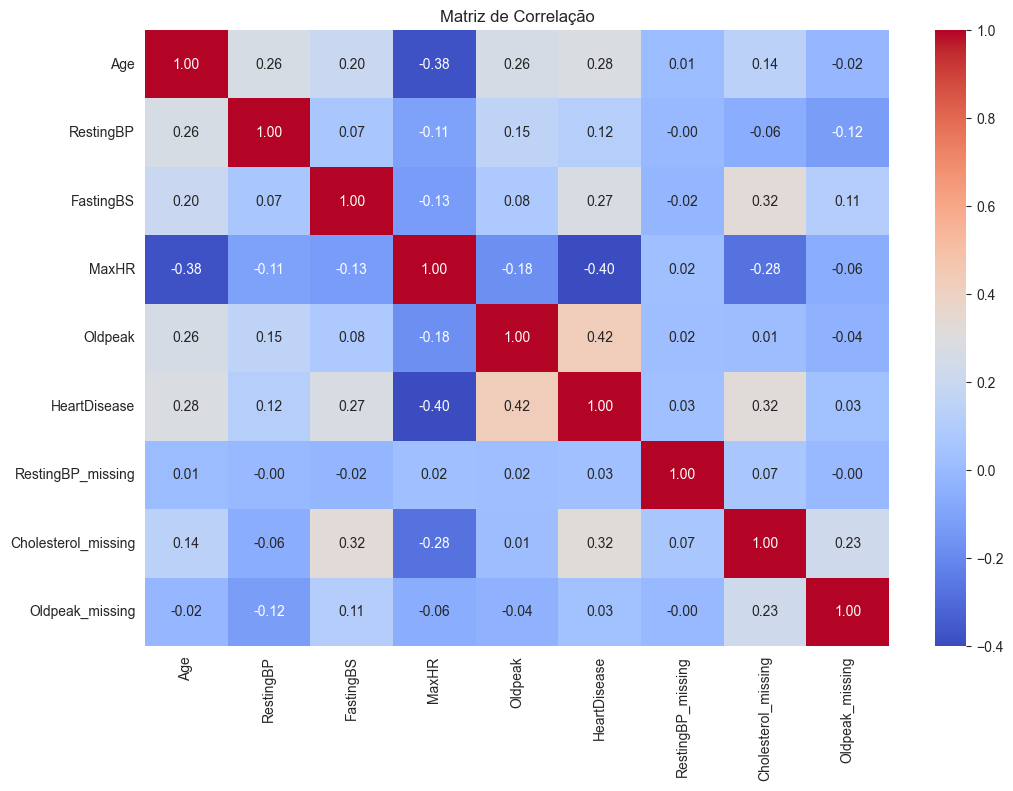

In [96]:
# Refazendo a matriz de correlação para visualizar o efeito
corr = clean_data.corr(numeric_only= True)
plt.figure(figsize= (12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Matriz de Correlação')
plt.show()

In [97]:
clean_data.shape

(918, 14)

# Feature Engineering

### Age

In [98]:
clean_data['Age_group'] = pd.cut(clean_data['Age'],
                           bins=[27, 36, 46, 56, 66, 77],
                           labels=['28-36', '37-46', '47-56', '57-66', '67-77'])

In [99]:
clean_data['Age_group'].dtype

CategoricalDtype(categories=['28-36', '37-46', '47-56', '57-66', '67-77'], ordered=True, categories_dtype=object)

In [100]:
clean_data.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_missing,Cholesterol_missing,Oldpeak_missing,Age_group
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0,0,0,0,37-46
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1,0,0,0,47-56
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0,0,0,0,37-46
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1,0,0,0,47-56
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0,0,0,0,47-56


### RestingBP

In [101]:
clean_data['RestingBP_group'] = pd.cut(clean_data['RestingBP'],
                           bins=[79, 105, 130, 155, 180, 200],
                           labels=['80-105', '106-130', '131-155', '156-180', '181-200'])

In [102]:
clean_data['RestingBP_group'].dtype

CategoricalDtype(categories=['80-105', '106-130', '131-155', '156-180', '181-200'], ordered=True, categories_dtype=object)

In [103]:
clean_data.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_missing,Cholesterol_missing,Oldpeak_missing,Age_group,RestingBP_group
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0,0,0,0,37-46,131-155
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1,0,0,0,47-56,156-180
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0,0,0,0,37-46,106-130
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1,0,0,0,47-56,131-155
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0,0,0,0,47-56,131-155


### MaxHR

In [104]:
clean_data['MaxHR_group'] = pd.cut(clean_data['MaxHR'],
                                   bins = [59, 95, 130, 165, 202],
                                   labels= ['60-95', '96-130', '131-165', '166-202'])

In [105]:
clean_data['MaxHR_group'].dtype

CategoricalDtype(categories=['60-95', '96-130', '131-165', '166-202'], ordered=True, categories_dtype=object)

In [106]:
clean_data.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_missing,Cholesterol_missing,Oldpeak_missing,Age_group,RestingBP_group,MaxHR_group
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0,0,0,0,37-46,131-155,166-202
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1,0,0,0,47-56,156-180,131-165
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0,0,0,0,37-46,106-130,96-130
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1,0,0,0,47-56,131-155,96-130
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0,0,0,0,47-56,131-155,96-130


### Oldpeak

In [107]:
clean_data['Oldpeak_group'] = pd.cut(clean_data['Oldpeak'],
                                     bins = [-1, 1.5, 3, 4.5, 6.2],
                                     labels = ['0-1.5', '1.6-3.0', '3.1-4.5', '4.6-6.2'])

In [108]:
clean_data['Oldpeak_group'].dtype

CategoricalDtype(categories=['0-1.5', '1.6-3.0', '3.1-4.5', '4.6-6.2'], ordered=True, categories_dtype=object)

In [109]:
clean_data.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_missing,Cholesterol_missing,Oldpeak_missing,Age_group,RestingBP_group,MaxHR_group,Oldpeak_group
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0,0,0,0,37-46,131-155,166-202,0-1.5
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1,0,0,0,47-56,156-180,131-165,0-1.5
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0,0,0,0,37-46,106-130,96-130,0-1.5
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1,0,0,0,47-56,131-155,96-130,0-1.5
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0,0,0,0,47-56,131-155,96-130,0-1.5


# Pré-processamento

### Divisão entre Classe e Provisores

In [110]:
X_data = clean_data.drop('HeartDisease', axis = 1)
Y_data = clean_data['HeartDisease']

In [111]:
X_data.shape

(918, 17)

In [112]:
Y_data.shape

(918,)

### Label Encoder (utilizando o map() do Pandas)

In [113]:
# Aplicando map() nas variáveis categóricas binárias.
X_data['ExerciseAngina'] = X_data['ExerciseAngina'].map({'N': 0, 'Y': 1})
X_data['Sex'] = X_data['Sex'].map({'F': 0, 'M': 1})

In [114]:
X_data.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingBP_missing,Cholesterol_missing,Oldpeak_missing,Age_group,RestingBP_group,MaxHR_group,Oldpeak_group
0,40,1,ATA,140,0,Normal,172,0,0.0,Up,0,0,0,37-46,131-155,166-202,0-1.5
1,49,0,NAP,160,0,Normal,156,0,1.0,Flat,0,0,0,47-56,156-180,131-165,0-1.5
2,37,1,ATA,130,0,ST,98,0,0.0,Up,0,0,0,37-46,106-130,96-130,0-1.5
3,48,0,ASY,138,0,Normal,108,1,1.5,Flat,0,0,0,47-56,131-155,96-130,0-1.5
4,54,1,NAP,150,0,Normal,122,0,0.0,Up,0,0,0,47-56,131-155,96-130,0-1.5


### Cat Code

#### ST_Slope

In [115]:
from pandas.api.types import CategoricalDtype

slope_type = CategoricalDtype(categories=['Up', 'Flat', 'Down'], ordered=True)
X_data['ST_Slope'] = X_data['ST_Slope'].astype(slope_type)
X_data['ST_Slope'] = X_data['ST_Slope'].cat.codes

#### As colunas adicionadas na etapa de Feature Engineering

In [116]:
X_data['Age_group_encoded'] = X_data['Age_group'].cat.codes
X_data['RestingBP_group_encoded'] = X_data['RestingBP_group'].cat.codes
X_data['MaxHR_group_encoded'] = X_data['MaxHR_group'].cat.codes
X_data['Oldpeak_group_encoded'] = X_data['Oldpeak_group'].cat.codes


In [117]:
X_data.drop(['Age_group', 'RestingBP_group', 'MaxHR_group', 'Oldpeak_group'], axis= 1, inplace=True)

### One Hot Encoder

In [118]:
OH_columns = ['ChestPainType', 'RestingECG']
X_data = pd.get_dummies(X_data, columns=OH_columns, drop_first=True)

In [119]:
X_data.shape

(918, 20)

In [120]:
X_data.head()

,Age,Sex,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingBP_missing,Cholesterol_missing,Oldpeak_missing,Age_group_encoded,RestingBP_group_encoded,MaxHR_group_encoded,Oldpeak_group_encoded,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,1,140,0,172,0,0.0,0,0,0,0,1,2,3,0,True,False,False,True,False
1,49,0,160,0,156,0,1.0,1,0,0,0,2,3,2,0,False,True,False,True,False
2,37,1,130,0,98,0,0.0,0,0,0,0,1,1,1,0,True,False,False,False,True
3,48,0,138,0,108,1,1.5,1,0,0,0,2,2,1,0,False,False,False,True,False
4,54,1,150,0,122,0,0.0,0,0,0,0,2,2,1,0,False,True,False,True,False


### Escalonamento

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [122]:
numeric_columns = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']

X_data[numeric_columns] = scaler.fit_transform(X_data[numeric_columns])

In [123]:
X_data.head()

,Age,Sex,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingBP_missing,Cholesterol_missing,Oldpeak_missing,Age_group_encoded,RestingBP_group_encoded,MaxHR_group_encoded,Oldpeak_group_encoded,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,-1.433140,1,0.415002,0,1.382928,0,-0.875154,0,0,0,0,1,2,3,0,True,False,False,True,False
1,-0.478484,0,1.527329,0,0.754157,0,0.086761,1,0,0,0,2,3,2,0,False,True,False,True,False
2,-1.751359,1,-0.141161,0,-1.525138,0,-0.875154,0,0,0,0,1,1,1,0,True,False,False,False,True
3,-0.584556,0,0.303769,0,-1.132156,1,0.567718,1,0,0,0,2,2,1,0,False,False,False,True,False
4,0.051881,1,0.971166,0,-0.581981,0,-0.875154,0,0,0,0,2,2,1,0,False,True,False,True,False


### Divisão entre Teste e Treinamento

In [124]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X_data, Y_data, test_size=0.15, random_state=42, stratify=Y_data)

In [125]:
xTrain.shape, xTest.shape

((780, 20), (138, 20))

In [126]:
yTrain.shape, yTest.shape

((780,), (138,))

# Treinamento dos Modelos

Irei utilizar o `cross_val_score` para pré-selecionar o modelo mais promissor, para, então, realizar o tunnig de hiperparâmetros e treinar o modelo final com `train_test_split`

In [127]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'Regressão Logística': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': XGBClassifier(random_state=42, device='cpu'),
    'Gradient Boosting (SK Learn)': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

scoring = ['accuracy', 'precision', 'recall', 'f1']

results = {}

for name, model in models.items():
    scores = cross_validate(model, X_data, Y_data, cv=5, scoring=scoring, n_jobs=2)
    results[name] = {
        'Acurácia': scores['test_accuracy'].mean(),
        'Precisão': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1-score': scores['test_f1'].mean()
    }

# Convertendo para DataFrame para melhor visualização
results_df = pd.DataFrame(results).T.sort_values(by='F1-score', ascending=False)

print("Resultados da Validação Cruzada (médias):")
print(results_df)

melhor_modelo = results_df.idxmax()['F1-score']
print(f"\nMelhor modelo com base no F1-score: {melhor_modelo}")


Resultados da Validação Cruzada (médias):
                              Acurácia  Precisão    Recall  F1-score
Gradient Boosting (SK Learn)  0.831076  0.859806  0.842322  0.845420
SVM                           0.824531  0.843882  0.848301  0.841260
Gradient Boosting             0.822333  0.853838  0.832440  0.837228
Random Forest                 0.816964  0.850026  0.828674  0.831438
Regressão Logística           0.815877  0.853651  0.824675  0.830317
KNN                           0.800636  0.826378  0.822831  0.819114
Árvore de Decisão             0.720997  0.768518  0.730091  0.741178
Naive Bayes                   0.687390  0.916606  0.494079  0.626399

Melhor modelo com base no F1-score: Gradient Boosting (SK Learn)


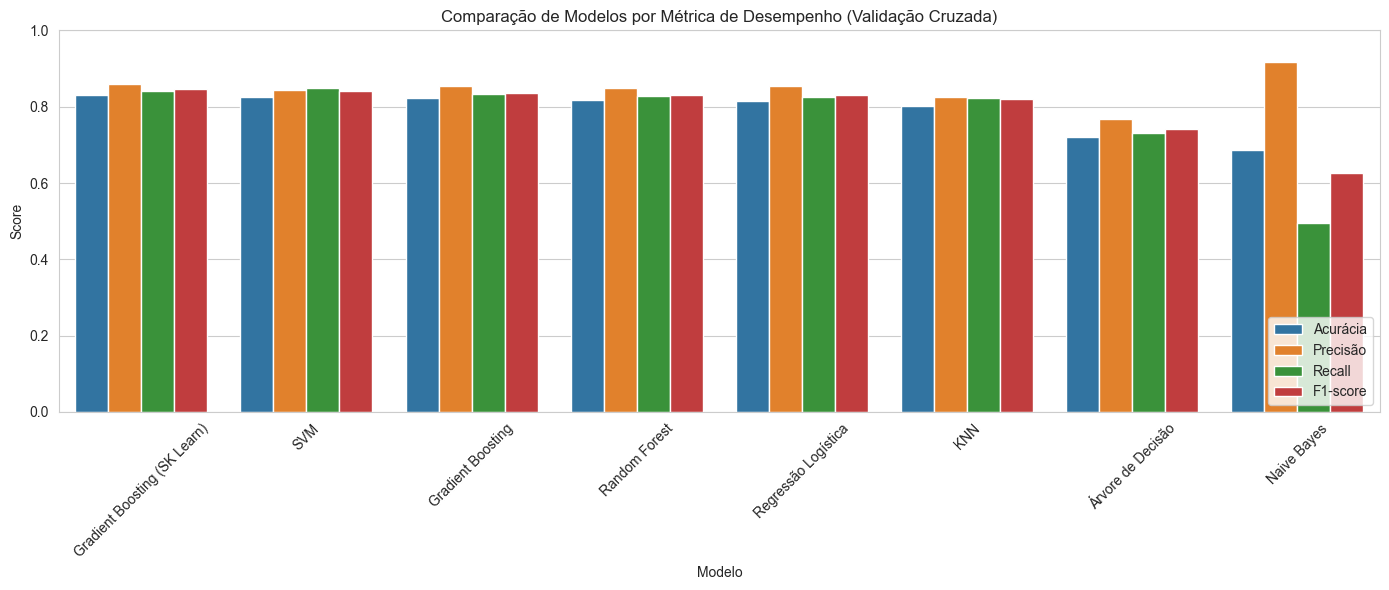

In [128]:
results_long = results_df.reset_index().melt(id_vars='index', var_name='Métrica', value_name='Score')
results_long.rename(columns={'index': 'Modelo'}, inplace=True)


plt.figure(figsize=(14, 6))
sns.barplot(data=results_long, x='Modelo', y='Score', hue='Métrica')
plt.title('Comparação de Modelos por Métrica de Desempenho (Validação Cruzada)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

O modelo selecionado foi o Gradient Boosting.

# Tunagem de Hiperparâmetros

Para realizar a tunagem de hiperparâmetros do modelo selecionado, irei utilizar o `GridSearchCV`, que é é uma técnica do scikit-learn para encontrar automaticamente os melhores hiperparâmetros através de uma busca exaustiva.

In [129]:
from sklearn.model_selection import GridSearchCV, cross_val_predict

param_grid = { # Lista / Dicionário de possíveis hiperparâmetros do modelo
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'subsample': [0.8, 1.0],
    'loss': ['log_loss', 'exponential']
}


GB = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(estimator=GB, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(xTrain, yTrain)

Tunned_GB = grid.best_estimator_
y_predict = Tunned_GB.predict(xTest)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor F1-score na validação cruzada:", grid.best_score_)

Melhores parâmetros: {'learning_rate': 0.05, 'loss': 'exponential', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Melhor F1-score na validação cruzada: 0.8859871245768373


# Avaliação dos Modelos

### Classification Report

In [130]:
from sklearn.metrics import classification_report

print(classification_report(yTest, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        62
           1       0.91      0.93      0.92        76

    accuracy                           0.91       138
   macro avg       0.91      0.91      0.91       138
weighted avg       0.91      0.91      0.91       138



### Curva ROC e AUC

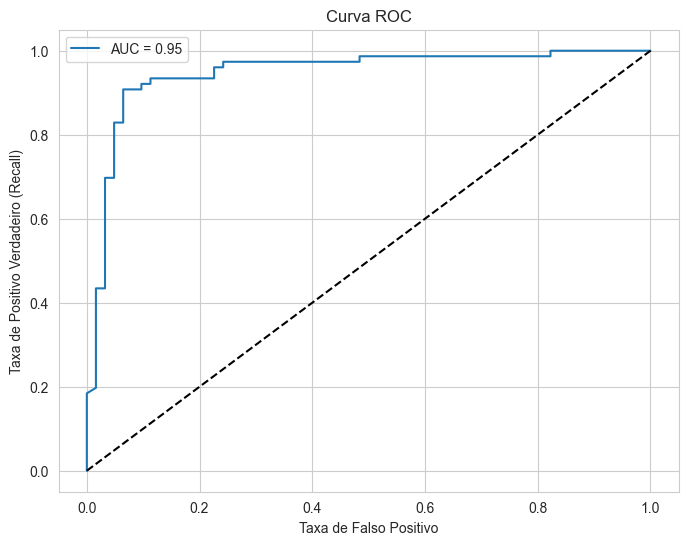

In [131]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = Tunned_GB.decision_function(xTest)

fpr, tpr, thresholds = roc_curve(yTest, y_scores)
auc_score = roc_auc_score(yTest, y_scores)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0,1], 'k--')  # diagonal aleatória
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Positivo Verdadeiro (Recall)')
plt.title('Curva ROC')
plt.legend()
plt.show()


### Curva Precisão-Recall

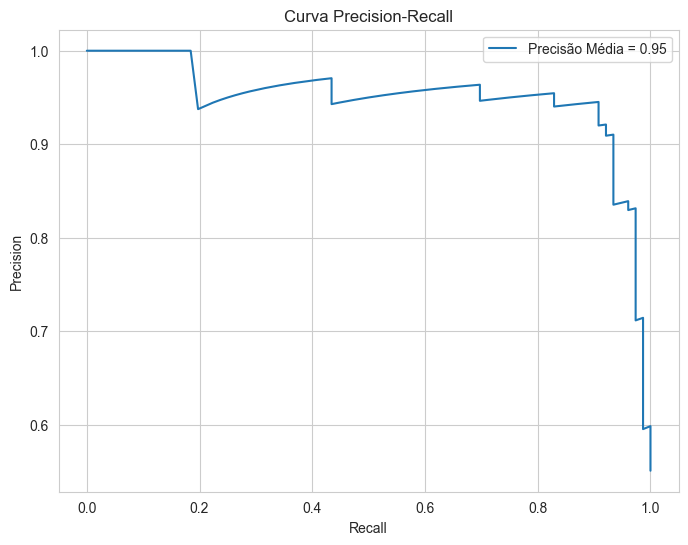

In [132]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(yTest, y_scores)
ap = average_precision_score(yTest, y_scores)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precisão Média = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()


### Matriz de Confusão

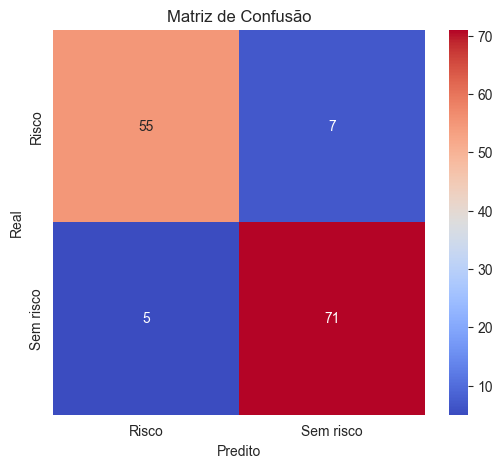

In [133]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yTest, y_predict)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Risco', 'Sem risco'], yticklabels=['Risco', 'Sem risco'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


### Métricas Gerais

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(yTest, y_predict)
prec = precision_score(yTest, y_predict)
rec = recall_score(yTest, y_predict)
f1 = f1_score(yTest, y_predict)

print(f"Acurácia: {acc:.3f}")
print(f"Precisão: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")


Acurácia: 0.913
Precisão: 0.910
Recall: 0.934
F1-score: 0.922


# Conclusão Final

Embora o dataset seja pequeno (apenas 918 registros), consegui realizar uma análise profunda do panorama e desenvolver um modelo funcional.
O dataset possuía poucas colunas com valores inválidos, então a etapa de limpeza e tratamento não foi trabalhosa.

Optei pela etapa de Feature Engineering para criar colunas "flag" para facilitar o modelo a identificar padrões.

Na etapa de pré-processamento, optei por 3 tipos de encoder, separando-os baseando-se no tipo de variável categórica (binária, nominal e ordinal) e realizei o escalonamento das variáveis numéricas.

Sobre o "test_size", optei por um tamanho de 15%, pois haveria uma quantidade boa de dados para treinar o modelo sem overfitting. Inicialmente, optei por 30%, mas observei que o recall do modelo se comportava melhor com 15% de test_size.

Nas etapas de Treinamento e Tunagem, optei por técnicas do sklearn. No primeiro caso, utilizei validação cruzada para pré-selecionar o modelo mais prospecto, utilizando recall e f1-score como as métricas principais. Já no segundo caso, utilizei a técnica de GridSearchCV, onde são realizados automaticamente vários testes para escolher os melhores hiperparâmetros.

E por fim, escolhi como métrica principal o recall (sendo um recall de 93,4%), pois o foco do modelo é segurança e sensibilidade médica e, ao escolher o recall como principal métrica, evito deixar pacientes com possíveis doenças cardíaca passarem despercebidos.

Acredito que para ter um proveito melhor do modelo, seria necessário ter mais dados para análise e treino/teste. Mas, tendo em vista o tamanho atual do dataset, acredito que consegui extrair um bom resultado.